<a href="https://colab.research.google.com/github/ramanath-naik/machine_learning/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

file_path = '/content/sample_data/california_housing_test.csv'

housing = pd.read_csv(file_path)

# Adjust display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 700)

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


In [ ]:
housing["households"].value_counts()

households
273.0     12
375.0     12
614.0     12
363.0     11
287.0     11
          ..
685.0      1
89.0       1
973.0      1
802.0      1
1036.0     1
Name: count, Length: 1026, dtype: int64

In [2]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [3]:
print(len(train_set))
print(len(test_set))

2400
600


In [4]:
housing["income_cat"] = pd.cut(
    housing["median_income"],  # Column to be categorized
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],  # Bin boundaries
    labels=[1, 2, 3, 4, 5]  # Labels for each bin
)
print(housing["income_cat"])


0       5
1       3
2       4
3       5
4       2
       ..
2995    1
2996    3
2997    2
2998    3
2999    5
Name: income_cat, Length: 3000, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]


<Axes: >

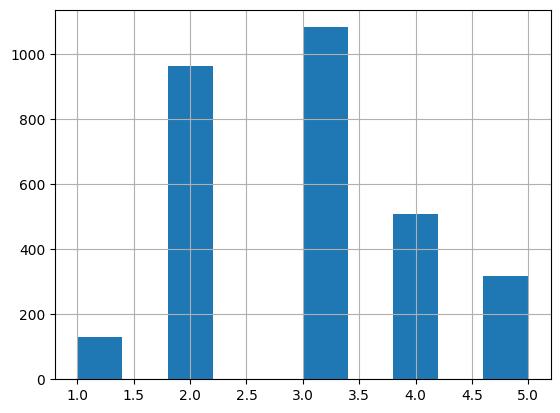

In [ ]:
housing["income_cat"].hist()

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Iterate over the splits generated by StratifiedShuffleSplit
for train_index, test_index in split.split(housing, housing["income_cat"]):
    # Create training set using the indices of the training split
    strat_train_set = housing.loc[train_index]
    # Create test set using the indices of the test split
    strat_test_set = housing.loc[test_index]


In [ ]:
strat_test_set["income_cat"].value_counts()

income_cat
3    216
2    192
4    102
5     64
1     26
Name: count, dtype: int64

In [ ]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)


income_cat
3    0.360000
2    0.320000
4    0.170000
5    0.106667
1    0.043333
Name: count, dtype: float64

In [6]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

In [ ]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

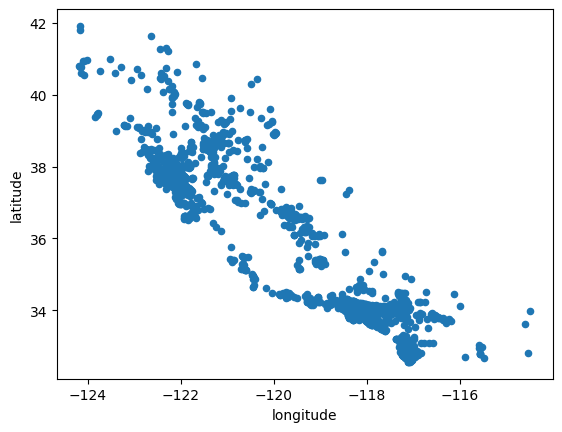

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude")

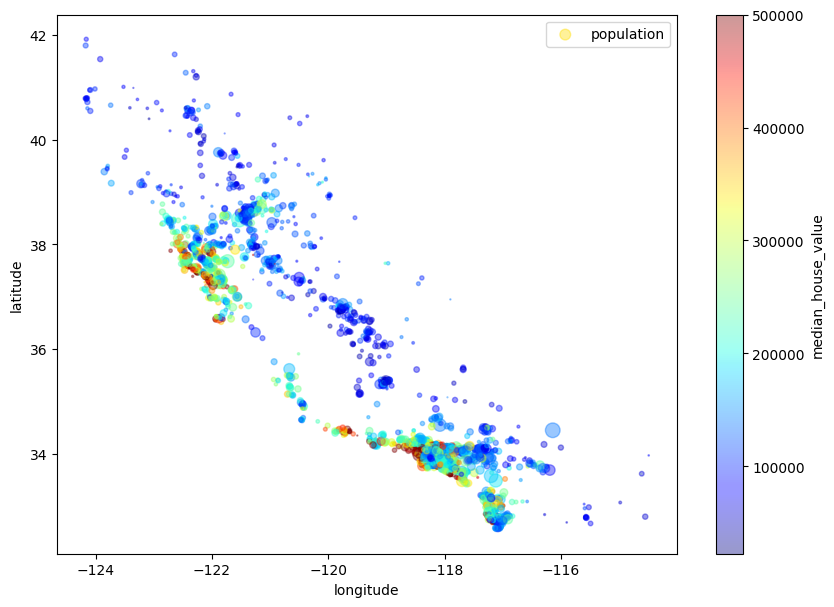

In [7]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population", figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [8]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.672695
income_cat            0.623960
total_rooms           0.160427
households            0.100176
housing_median_age    0.091409
total_bedrooms        0.082279
population           -0.001192
longitude            -0.050662
latitude             -0.138428
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

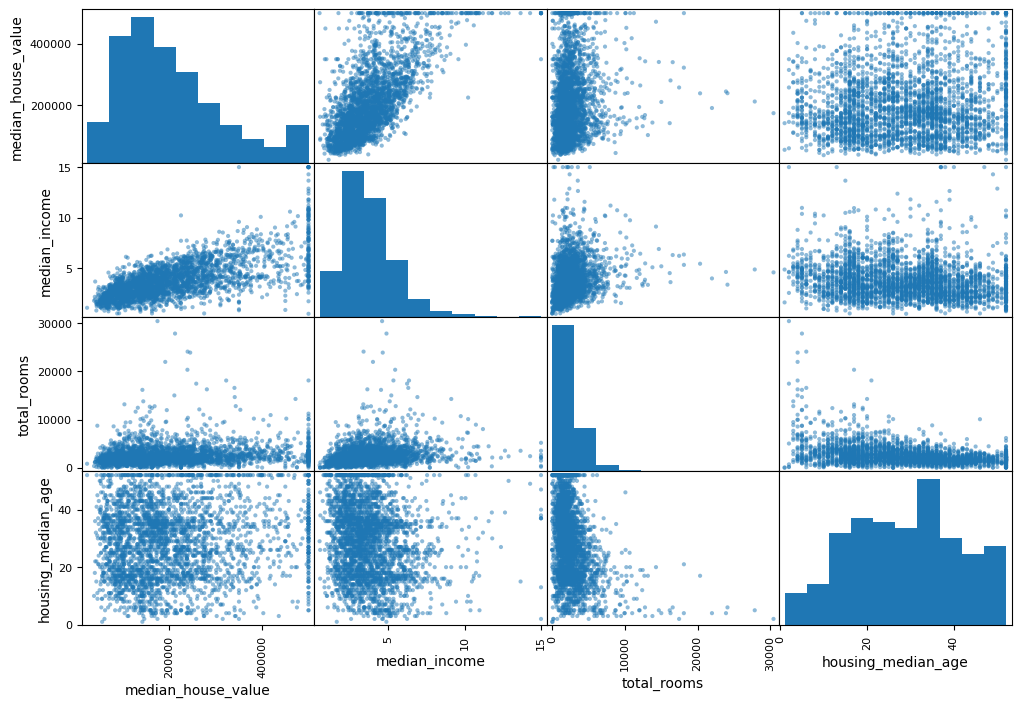

In [9]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

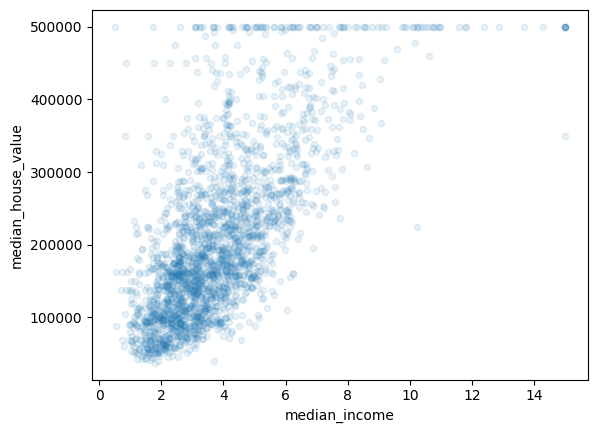

In [ ]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [10]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [11]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.672695
income_cat                  0.623960
total_rooms                 0.160427
rooms_per_household         0.153429
households                  0.100176
housing_median_age          0.091409
total_bedrooms              0.082279
population                 -0.001192
population_per_household   -0.045272
longitude                  -0.050662
latitude                   -0.138428
bedrooms_per_room          -0.246313
Name: median_house_value, dtype: float64

In [12]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

Training and Evaluating on the Training Set

In [13]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing, housing_labels)

LinearRegression()

In [14]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = some_data
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [177771.25860171 131676.76364196  93716.24090133 267471.86227285
 128230.28479613]
Labels: [121800.0, 175900.0, 137500.0, 248500.0, 139500.0]


In [15]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68558.1265596635

decision tree

In [16]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing, housing_labels)

DecisionTreeRegressor()

In [17]:
housing_predictions = tree_reg.predict(housing)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [18]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing, housing_labels,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [19]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [79460.33969865 67977.31538931 66056.92167908 80738.88579899
 74447.38128398 81023.28599982 79365.96546511 86734.61167572
 78390.45314989 84637.0111223 ]
Mean: 77883.21712628481
Standard deviation: 6298.5082575143715


In [20]:
lin_scores = cross_val_score(lin_reg, housing, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [64213.56133202 60156.18930952 75147.27163502 68298.83553796
 62014.41568368 63947.94571459 73584.67311033 78848.48900799
 74656.70991156 68703.78381383]
Mean: 68957.18750565004
Standard deviation: 6031.624563722004


Random forest

In [21]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing, housing_labels)

RandomForestRegressor()

In [22]:

housing_predictions = forest_reg.predict(housing)
forest_rmse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_rmse)
forest_rmse

21577.62193145874

In [23]:
forest_scores = cross_val_score(forest_reg, housing, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [58585.08657408 48468.28103029 61359.51029574 56558.59700659
 53581.45397347 54450.58466992 61480.64420493 68156.88734357
 57764.56779231 60211.80858229]
Mean: 58061.74214731787
Standard deviation: 5068.219531553588


In [ ]:
import joblib

joblib.dump(forest_reg, "forest_reg_model.pkl")


['forest_reg_model.pkl']

In [ ]:
loaded_model = joblib.load("forest_reg_model.pkl")


In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = [
  {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
  {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

grid_search.fit(housing, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [25]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [27]:
grid_search.best_estimator_

print(grid_search.best_estimator_)


RandomForestRegressor(max_features=6, n_estimators=30)


In [28]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

74840.99186527956 {'max_features': 2, 'n_estimators': 3}
65699.53891438518 {'max_features': 2, 'n_estimators': 10}
62611.57607892989 {'max_features': 2, 'n_estimators': 30}
71437.5933111354 {'max_features': 4, 'n_estimators': 3}
63296.45498085477 {'max_features': 4, 'n_estimators': 10}
59816.59597534144 {'max_features': 4, 'n_estimators': 30}
70028.59392526411 {'max_features': 6, 'n_estimators': 3}
61824.1206920611 {'max_features': 6, 'n_estimators': 10}
59409.31351466458 {'max_features': 6, 'n_estimators': 30}
69603.80749303651 {'max_features': 8, 'n_estimators': 3}
62000.53904798479 {'max_features': 8, 'n_estimators': 10}
60637.38814636986 {'max_features': 8, 'n_estimators': 30}
72343.58641154434 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
63097.125825650364 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
67874.02621110104 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
61887.156870641484 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

In [29]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.13660973, 0.13551844, 0.07102729, 0.03465754, 0.04175053,
       0.05291285, 0.03221181, 0.4953118 ])

In [30]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = X_test


In [33]:
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

62593.87030740881

In [34]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
    loc=squared_errors.mean(),
    scale=stats.sem(squared_errors)))

array([56485.63749259, 68156.86287658])